# <center>Non-Linear Regression Analysis</center>

*guys sorry tadi aku salah sebut model naive bayes. model baseline ya bukan pipeline! hiks

## More source to learn non-linear regression 

- https://www.graphpad.com/guides/prism/7/curve-fitting/reg_a_guide_to_nonlinear_regressio.htm <- very detail explanation! 

- https://cs.stanford.edu/~ermon/cs325/slides/ml_nonlin_reg.pdf

- https://statisticsbyjim.com/regression/choose-linear-nonlinear-regression/

- https://www.cs.cmu.edu/~aarti/Class/10315_Fall19/lecs/Lecture17.pdf

### Introduction
Udah pasti gak semua data yang kita dapat punya data yang cocok dengan linear regression model. Jika kita bertemu data yang mempunyai persebaran data dengan kecenderungan grafik melengkung dan bukan linear, maka udah pasti linear regression gak bisa memberikan akurasi yang baik karena satu hal utama pada linear regression adalah data harus linear.

Nah, solusinya? Non-Linear Regression.



Sebelum memutuskan algoritma apa yang cocok untuk data yang kita punya, maka harus dilakukan **Exploratory Data Analysis**. Step ini penting banget supaya kita ngerti data apa sih yang kita hadapi, apakah data ini udah cukup *bersih* dari null values, duplicate values, dan lain-lain. hal ini penting banget karena data yang kosong atau duplikat bisa mempengaruhi model kita. 

nah untuk pembelajaran kali ini, yang paling gampang untuk dilakukan pertama kali adalah dengan visualisasi data yang kita punya. (Kalau mau baca lebih mengenai EDA (https://medium.com/data-folks-indonesia/memahami-data-dengan-exploratory-data-analysis-a53b230cce84)

### Library yang dibutuhkan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Seperti yang kita tahu, Linear Regression bisa memperbaiki banyak masalah, tapi tentu saja gak untuk semua dataset. hal utama gimana linear regression bisa berikan model untuk satu dataset adalah linear regression memodelkan relasi antara dependent variable (atau y) dan independent variable (x). 

Contoh:

y = 2x + 3

(Disini datanya dibuat random di antara garis model y)

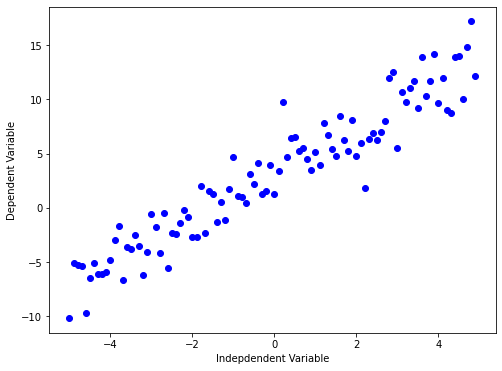

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)

y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Yang pasti kita liat pertama kali dari sini adalah data ini bisa gunain linear regression.

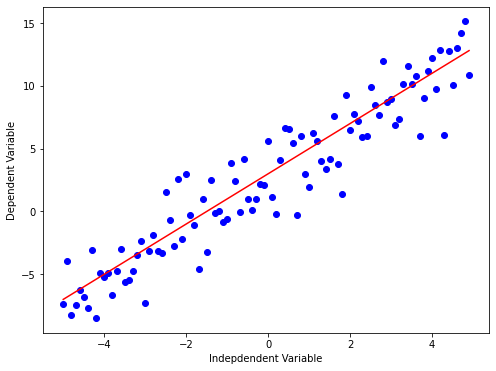

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)

y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Non-Linear Regression adalah hubungan antara independent variable dan dependent variable tapi hasilnya bukan garis linear, melainkan non linear. Gampangnya semua garis yang gak linear (atau lurus naik/turun) udah pasti non-linear. Biasanya direpresentasikan dengan polinomial (perpangkatan dari x).

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Fungsi Non-linear punya banyak elemen lain seperti eksponensial, log, fraksi, etc. Misalnya  :

$$ y = \log(x)$$
    
Atau yang lebih rumit :
$$ y = \log(a x^3 + b x^2 + c x + d)$$

Contoh dari fungsi dengan perpangkatan 3 (cubic power)

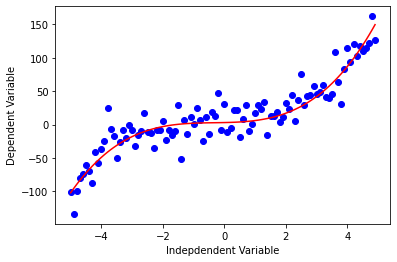

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Bisa diliat kalau di fungsi ini $x^3$ dan $x^2$ adalah independent variable-nya. Grafik yang dihasilkan dari fungsi ini bukan garis lurus. Jadi fungsi di atas adalah fungsi non-linear.

Contoh lain dari fungsi non-linear : 

### Quadratic

$$ Y = X^2 $$

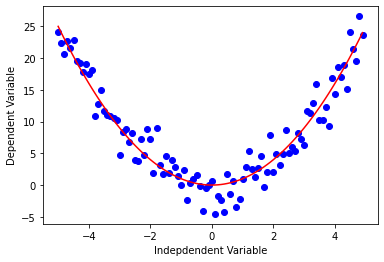

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)

# Kalian bisa coba ganti-ganti rumusnya untuk lihat perubahan dari grafiknya

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Exponential

Fungsi exponential dengan base c didefinisikan dengan :

 $$ Y = a + b c^X$$ 
 
 
 di mana b ≠0, c > 0 , c ≠1, dan x merupakan angka real. Basis c adalah konstan dan eksponen x adalah variabelnya.


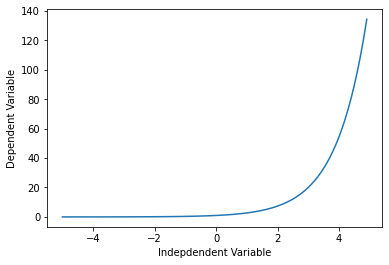

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Logarithmic

Contoh paling simple dari log: $$ y = \log(x)$$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


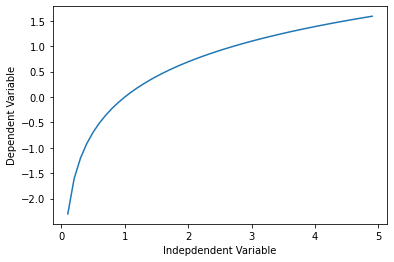

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Sigmoidal/Logistic

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

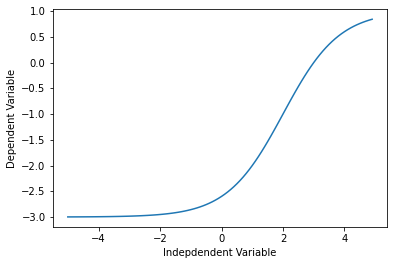

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

<a id="ref2"></a>
### Non-Linear Regression example

Nah, sekarang kita coba langsung pakai model non-linear pada datapoints asli. Data yang kita gunakan di sini adalah GDP China dari 1960 - 2014. 

Kolom yang kita gunakan di sini adlaah tahun (1960 - 2014) dan GDP (dalam dollar US) pada tahun tersebut.

In [ ]:
import numpy as np
import pandas as pd

!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

2020-10-30 11:28:27 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


### Plotting the Dataset ###

Yang kita harus tahu pertama adalah bagaimana persebaran datapoints tersebut. Di sini kita bisa memutuskan datanya akan lebih cocok dengan fungsi log atau eksponensial.

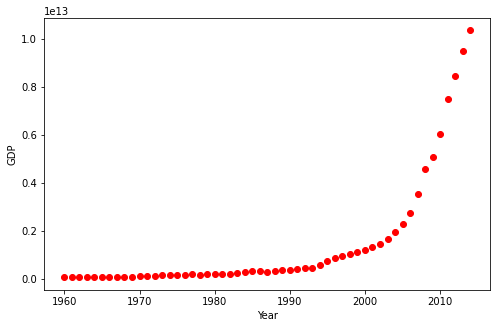

In [ ]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Bisa kita lihat kalau pertumbuhan dari GDP dimulai dengan lambat, lalu mulai dari tahun 2005 ke atas, pertumbuhannya mulai signifikan, dan pada 2010 pertumbuhan mulai melambat kembali.

### Pemilihan model ###

dari persebaran data yang kita dapat dari grafik di atas, kita dapat memperikaran bahwa fungsi log adalah fungsi yang cocok untuk model kita. 

Karena data dimulai dengan pertumbuhan yang lambat dan peningkatan pertumbuhan pada pertengahan, dan melambat kembali pada akhir. maka dengan ilustrasi:

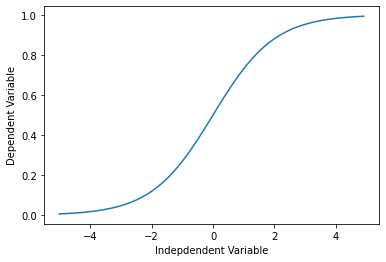

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Rumus log yang digunakan pada fungsi grafik di atas :

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: mengendalikan kecuramannya (steepness),

$\beta_2$: Menggeser kurva pada sumbu x.

### Model ###

Sekarang kita akan membangun regression model kita dan menginisialisasi paramaternya.

In [ ]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Garis sigmoid yang ditaruh pada data:

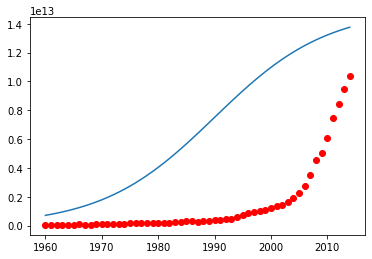

In [ ]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

Tugas kita di sini adalah menemukan parameter yang cocok untuk model kita. Hal pertama yang harus kita lakukan adalah menormalisasi x dan y: 

(Teknik - teknik dari normalization yang kalian bisa pelajari lebih lanjut https://developers.google.com/machine-learning/data-prep/transform/normalization)

In [ ]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

Gimana sih kita bisa dapetin parameter paling cocok untuk model kita?

Kita bisa gunakan curve_fit yang akan nyari least squares non-linear untuk fungsi sigmoid ke data kita. Values optimal dari parameter sehingga RSS (residual sum squares) dari sigmoid(xdata, *popt) - ydata dapat diminimalisir.

popt adalah parameter yang kita optimasi.

In [ ]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453017, beta_2 = 0.997207


Sekarang kita akan plot hasil dari model regression kita.

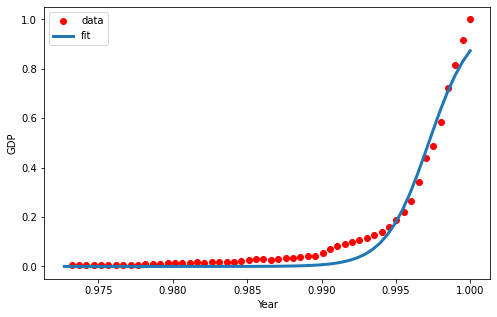

In [ ]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Ordinary Least Square (OLS)

More abour L1 L2 https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261

Akurasi dari model yang kita dapatkan :

In [ ]:
# Bagi data menjadi training dan testing
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# Bangun model dengan training data
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# Prediksi dengan testing data
y_hat = sigmoid(test_x, *popt)

# Evaluasi
print("MAE: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Mean dari RSS (MSE): %.3f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

MAE: 0.04
Mean dari RSS (MSE): 0.002
R2-score: 0.80


Beberapa algoritma untuk nonlinear data :

* Classification and Regression Trees
* Naive Bayes
* k-Nearest Neighbors
* Learning Vector Quantization
* Support Vector Machines

### Contoh penggunaan Support Vector Regression

more about svr: https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2

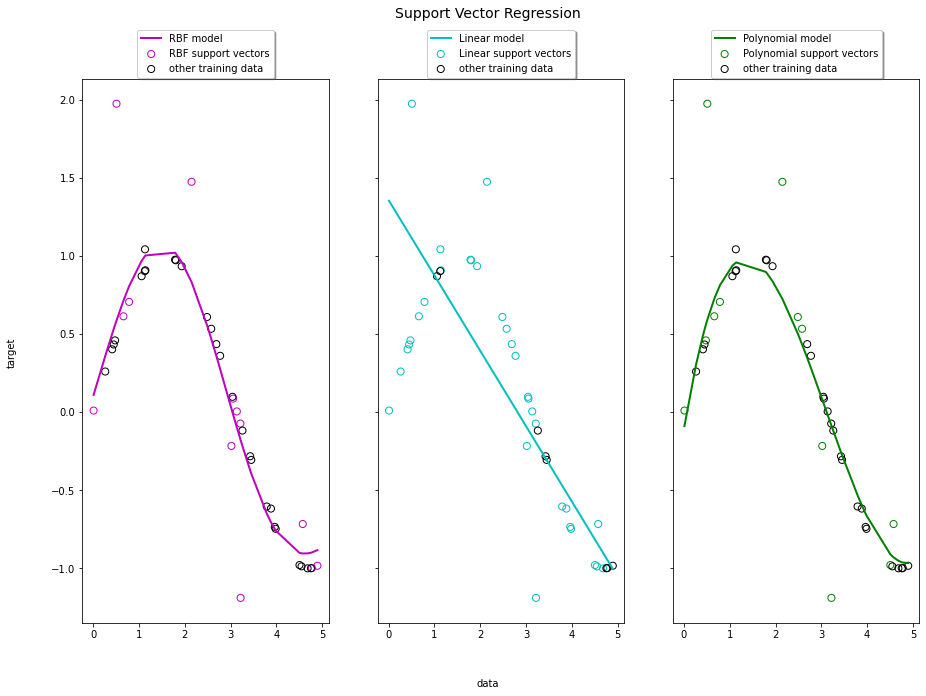

In [ ]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# Contoh noise pada data
y[::5] += 3 * (0.5 - np.random.rand(8))

# Model regressi
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

### Contoh penggunaan Decission Tree Regression

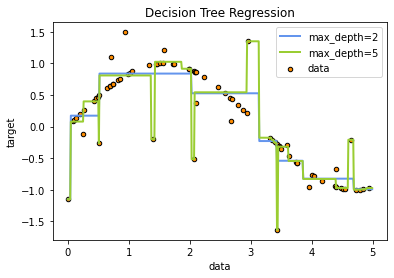

In [ ]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=3)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Contoh penggunaan KNeighbor Regression

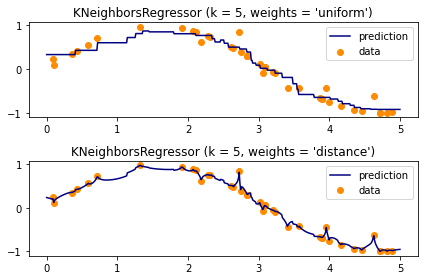

In [ ]:
# #############################################################################
# Generate sample data
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                               weights))

plt.tight_layout()
plt.show()

### Contoh penggunaan Naive Bayes Regression

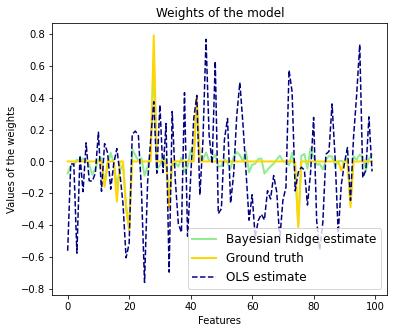

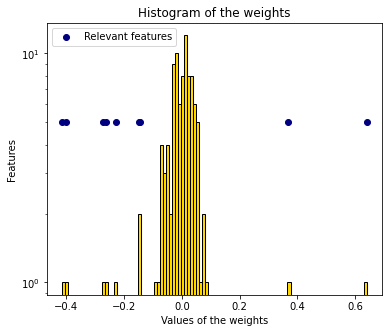

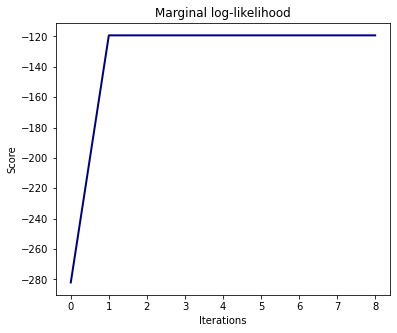

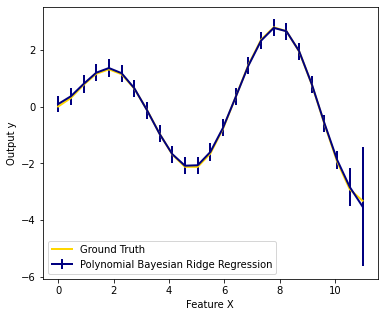

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import BayesianRidge, LinearRegression

# #############################################################################
# Generating simulated data with Gaussian weights
np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features)  # Create Gaussian data
# Create weights with a precision lambda_ of 4.
lambda_ = 4.
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))
# Create noise with a precision alpha of 50.
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise

# #############################################################################
# Fit the Bayesian Ridge Regression and an OLS for comparison
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

# #############################################################################
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='gold', log=True,
         edgecolor='black')
plt.scatter(clf.coef_[relevant_features], np.full(len(relevant_features), 5.),
            color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")


# Plotting some predictions for polynomial regression
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise


degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)
plt.plot(X_plot, y_plot, color='gold', linewidth=lw,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()